<a href="https://colab.research.google.com/github/IrfanChairurrachman/BPML-Dicoding/blob/master/submisi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Submission 3 </h2>
Dataset: 
https://www.kaggle.com/alessiocorrado99/animals10

berisi 28k gambar 10 kelas hewan dengan resolusi yang berbeda.

yang digunakan dalam pelatihan ini hanya 3 kelas hewan dengan total 12k gambar (12782)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
ls ~/.kaggle -la

total 16
drwxr-xr-x 2 root root 4096 Sep 11 10:56 ./
drwx------ 1 root root 4096 Sep 11 10:56 ../
-rw------- 1 root root   75 Sep 11 10:56 kaggle.json


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 97% 569M/586M [00:15<00:00, 34.1MB/s]
100% 586M/586M [00:15<00:00, 38.8MB/s]


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
import os
import zipfile
import shutil

# Ekstrak zip
local_zip = '/content/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
dir_utama = os.path.join('/content/raw-img')

print(os.listdir(dir_utama))

['pecora', 'cane', 'farfalla', 'ragno', 'gatto', 'cavallo', 'elefante', 'mucca', 'scoiattolo', 'gallina']


In [ ]:
# Direktori yang akan dihapus dimasukkan dalam list
ignore_dir = ['pecora', 'farfalla', 'gatto', 'cavallo', 'elefante', 'mucca', 'scoiattolo']

for dir in ignore_dir:
  # Path direktori
  path = os.path.join(dir_utama, dir)
  # Menghapus direktori terpilih beserta gambarnya
  shutil.rmtree(path)

print(os.listdir(dir_utama))

['cane', 'ragno', 'gallina']


<b>Keterangan nama direktori </b>(ini kayanya bahasa latin deh):
- Cane: Anjing
- Gallina: Ayam
- Ragno: Laba-laba


In [ ]:
from PIL import Image
# Print jumlah gambar di setiap direktori
jumlah_sampel = 0

for x in os.listdir(dir_utama):
  dir = os.path.join('/content/raw-img/', x)
  y = len(os.listdir(dir))
  print(x+':', y)
  jumlah_sampel = jumlah_sampel + y
  
  # Print 5 ukuran sampel gambar tiap direktori
  img_name = os.listdir(dir)
  for z in range(5):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')


print('\nJumlah total sampel:', jumlah_sampel)

cane: 4863
- (226, 300)
- (300, 200)
- (300, 232)
- (300, 200)
- (300, 201)
---------------
ragno: 4821
- (300, 215)
- (300, 225)
- (249, 300)
- (261, 300)
- (424, 640)
---------------
gallina: 3098
- (300, 204)
- (300, 291)
- (300, 232)
- (300, 189)
- (300, 225)
---------------

Jumlah total sampel: 12782


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2 # Membagi Data Validasi 20% dan Training 80%
)

In [ ]:
batch_size = 128 
# batch_size = 250

generator_latih = train_datagen.flow_from_directory(
    dir_utama,
    target_size = (150,150), # Besar Input harus sama besar dan dijadikan 150x150
    class_mode = 'categorical', # Menggunakan lebih dari 2 kelas
    batch_size = batch_size,
    subset = 'training' # Penentuan sebagai data latih
)

generator_validasi = train_datagen.flow_from_directory(
    dir_utama, # Direktori sama dengan generator latih karena pembagian dilakukan oleh Generator
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = batch_size,
    subset = 'validation' # Penentuan sebagai data latih
)

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Besar masukan dibuat sebesar 150x150 dengan warna 3 bytes
    # Konvulasi pertama
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvolusi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvolusi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Meratakan input menjadi 1 dimensi
    tf.keras.layers.Flatten(),
    # Menggunakan Dropout sebesar 50%
    tf.keras.layers.Dropout(0.5), 
    # 512 neuron terhadap hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 neuron/kelas pada output layer
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', # Opmitizer RMSprop
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92):
      print("\nAkurasi di atas 92%, hentikan pelatihan!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(generator_latih, 
                    epochs = 40, 
                    steps_per_epoch = 10227//batch_size, 
                    validation_data = generator_validasi, 
                    verbose = 1, 
                    validation_steps = 2555//batch_size,
                    callbacks = [callbacks])

Epoch 1/40
79/79 [==============================] - 90s 1s/step - loss: 1.1854 - accuracy: 0.4115 - val_loss: 0.9776 - val_accuracy: 0.5584
Epoch 2/40
79/79 [==============================] - 90s 1s/step - loss: 0.9524 - accuracy: 0.5598 - val_loss: 0.7564 - val_accuracy: 0.6690
Epoch 3/40
79/79 [==============================] - 90s 1s/step - loss: 0.8467 - accuracy: 0.6221 - val_loss: 0.7662 - val_accuracy: 0.6797
Epoch 4/40
79/79 [==============================] - 90s 1s/step - loss: 0.7273 - accuracy: 0.6884 - val_loss: 0.6156 - val_accuracy: 0.7414
Epoch 5/40
79/79 [==============================] - 90s 1s/step - loss: 0.6142 - accuracy: 0.7573 - val_loss: 0.7837 - val_accuracy: 0.7019
Epoch 6/40
79/79 [==============================] - 89s 1s/step - loss: 0.5779 - accuracy: 0.7749 - val_loss: 0.4788 - val_accuracy: 0.8183
Epoch 7/40
79/79 [==============================] - 89s 1s/step - loss: 0.5156 - accuracy: 0.8064 - val_loss: 0.4404 - val_accuracy: 0.8409
Epoch 8/40
79/79 [==

In [ ]:
# tf.keras.backend.clear_session()

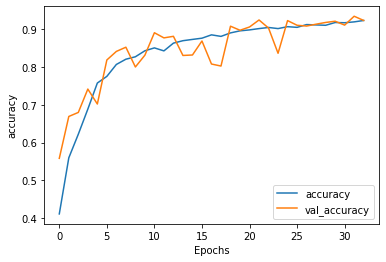

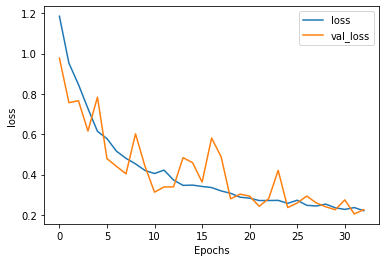

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpfdxdnfay/assets


In [ ]:
!ls -a

.   animals10.zip  kaggle.json	 raw-img      translate.py
..  .config	   model.tflite  sample_data
